<a href="https://colab.research.google.com/github/JeonJongDae/dinner_stock_AI/blob/main/%EC%A3%BC%EC%8B%9D_%EC%A2%85%EB%AA%A9_%EB%B6%84%EC%84%9D_%EC%82%BC%EC%84%B1%EC%A4%91%EA%B3%B5%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pykrx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.5/125.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 9.8 MB/s eta 0:00:00


In [9]:
start_date = '2018-01-01'
end_date='2023-04-11'
today='2023-04-11'
ticker = '010140'

In [10]:
from pykrx import stock
df = stock.get_market_ohlcv(start_date,end_date,ticker)
df.head()

,시가,고가,저가,종가,거래량,거래대금,등락률
날짜,,,,,,,
2018-01-02,6114,6397,6039,6372,5554598,42078893520,4.37
2018-01-03,6381,6556,6264,6472,5637219,43787935840,1.57
2018-01-04,6564,6955,6531,6806,11274259,91815514560,5.15
2018-01-05,6814,7080,6789,6989,9577578,80392188540,2.69
2018-01-08,7064,7080,6839,6955,4032736,33625341030,-0.48


<Axes: xlabel='날짜'>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


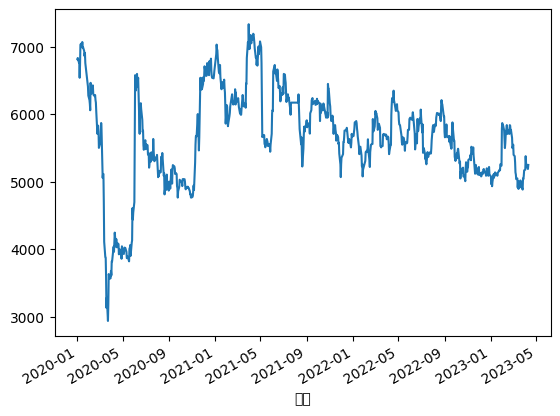

In [5]:
df['종가'].plot()

In [11]:
import plotly.express as px
fig = px.line(df, y='종가')
fig.show()

In [12]:
fig = px.bar(df,y='거래량')
fig.show()

In [22]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# Create figure with secondary y_axis
fig = make_subplots(specs=[[{'secondary_y':True}]])

#Add traces
fig.add_trace(
    go.Line(x=df.index, y=df['종가']),
    secondary_y=False
)
#Add traces
fig.add_trace(
    go.Bar(x=df.index, y=df['거래량']),
    secondary_y=True
)

fig.update_xaxes(
    tickformat="%b\n%Y",
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
        ])
    )
)

# set y_axes title
fig.update_yaxes(title_text="Close axis", secondary_y=False)
fig.update_yaxes(title_text="Volume axis", secondary_y=True)
fig.show()

In [25]:
df=stock.get_market_fundamental(start_date,end_date,ticker)
df.head()

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2018-01-02,16058,0.0,0.48,0,0.0,0
2018-01-03,16058,0.0,0.48,0,0.0,0
2018-01-04,16058,0.0,0.51,0,0.0,0
2018-01-05,16058,0.0,0.52,0,0.0,0
2018-01-08,16058,0.0,0.52,0,0.0,0


<Axes: xlabel='날짜'>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.



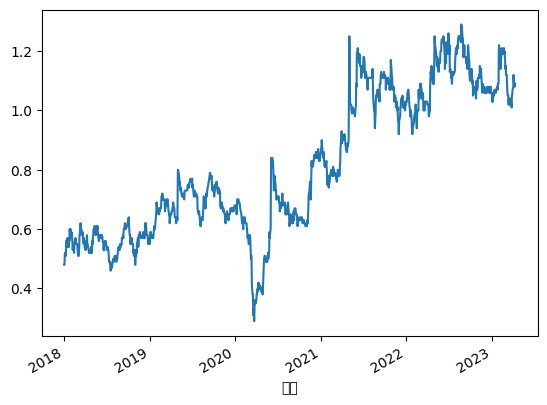

In [29]:
df['PBR'].plot()

In [32]:
!pip install pandas-datareader
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
from pandas_datareader import data
import yfinance as yfin

yfin.pdr_override()

df = data.get_data_yahoo('SIVB',start='2023-01-01',end='2023-04-30')
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-03,0.8770,1.170,0.877,0.98505,0.98505,16018917
2023-04-04,0.9900,1.080,0.912,0.97000,0.97000,6836192
2023-04-05,0.9680,1.040,0.881,0.91010,0.91010,4847379
2023-04-06,0.9290,0.929,0.750,0.79900,0.79900,6573026
2023-04-10,0.8076,0.849,0.500,0.60500,0.60500,13347180


In [39]:
import pandas as pd

In [71]:
temp = data.get_data_yahoo('SIVB', start = '2023-04-05',end='2023-04-11')
temp.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-05,0.9680,1.040,0.881,0.9101,0.9101,4847379
2023-04-06,0.9290,0.929,0.750,0.7990,0.7990,6573026
2023-04-10,0.8076,0.849,0.500,0.6050,0.6050,13347180


In [77]:
bank_tickers = ['SIVB',
                'JPM', # JP Morgan 
                'BAC', # Bank of America
                'CCBG', # Capital City Bank Group
                'AXP' # American Express Company
                 ]
temp = data.get_data_yahoo('SIVB', start = '2023-04-05',end='2023-04-11')
temp.tail()
temp.reset_index()


temp['Code']='SIVB'
df=temp
df.head()
#df = pd.DataFrame()
for ticker in bank_tickers:
      temp = data.get_data_yahoo(ticker, start = '2023-04-05',end='2023-04-11')
      temp.reset_index()
      temp['Code']=ticker
     
      df = df.append(temp)
#    #  print(df.head())

# #     #3df = pd.concat(df, temp, right_index=True)
# #     #df = pd.merge(df, temp, right_index=True, left_index=True, how='outer', suffixes=('', ticker))
df.head(20)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-77-ced93dc1d5e0>:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-77-ced93dc1d5e0>:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-77-ced93dc1d5e0>:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-77-ced93dc1d5e0>:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


<ipython-input-77-ced93dc1d5e0>:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Open,High,Low,Close,Adj Close,Volume,Code
Date,,,,,,,
2023-04-05,0.968000,1.040000,0.881000,0.910100,0.910100,4847379,SIVB
2023-04-06,0.929000,0.929000,0.750000,0.799000,0.799000,6573026,SIVB
2023-04-10,0.807600,0.849000,0.500000,0.605000,0.605000,13347180,SIVB
2023-04-05,0.968000,1.040000,0.881000,0.910100,0.910100,4847379,SIVB
2023-04-06,0.929000,0.929000,0.750000,0.799000,0.799000,6573026,SIVB
2023-04-10,0.807600,0.849000,0.500000,0.605000,0.605000,13347180,SIVB
2023-04-05,126.800003,128.149994,126.459999,127.610001,127.610001,9614700,JPM
2023-04-06,127.000000,128.080002,126.860001,127.470001,127.470001,8760200,JPM
2023-04-10,126.540001,128.229996,126.220001,127.889999,127.889999,9465000,JPM
